Work on the Brooklyn Pedestrian Dataset: https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD

1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.


In [5]:
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD')
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian counts for each day of the week')

Text(0.5, 0, 'Weekdays')

Text(0, 0.5, 'Pedestrian Counts')

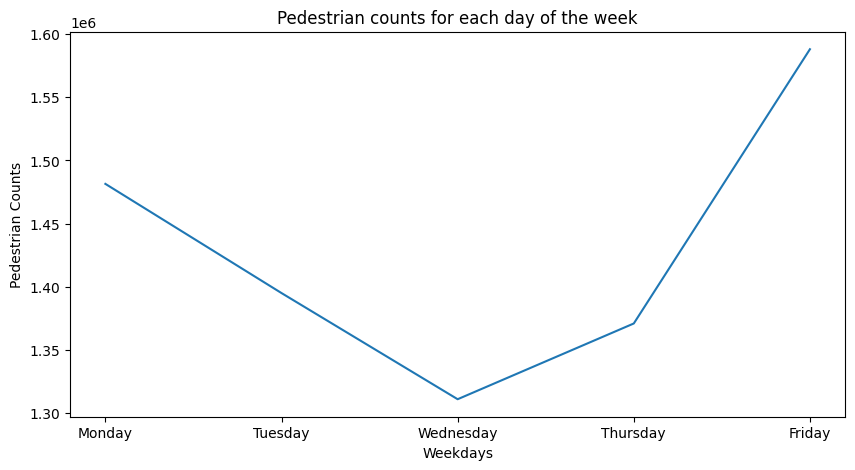

In [121]:
#1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.dayofweek

filtered_df = df[df['day_name'].isin(range(5))]

ped_counts = filtered_df.groupby('day_name')['Pedestrians'].sum().reset_index()
ped_counts['day_name'] = ped_counts['day_name'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

plt.figure(figsize=(10, 5))
plt.plot(ped_counts['day_name'], ped_counts['Pedestrians'])
plt.title('Pedestrian counts for each day of the week')
plt.xlabel('Weekdays')
plt.ylabel('Pedestrian Counts')
plt.show()

<Figure size 1000x500 with 0 Axes>

/var/folders/0n/vmqxs9xj47d34syqyfdyfq6w0000gn/T/ipykernel_15944/1935320872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pedestrians', y='weather_summary', data=weather, palette='coolwarm')


<Axes: xlabel='Pedestrians', ylabel='weather_summary'>

Text(0.5, 1.0, 'Average Pedestrian Counts vs Weather Condition')

Text(0.5, 0, 'Average Pedestrian Count')

Text(0, 0.5, 'Weather Condition')

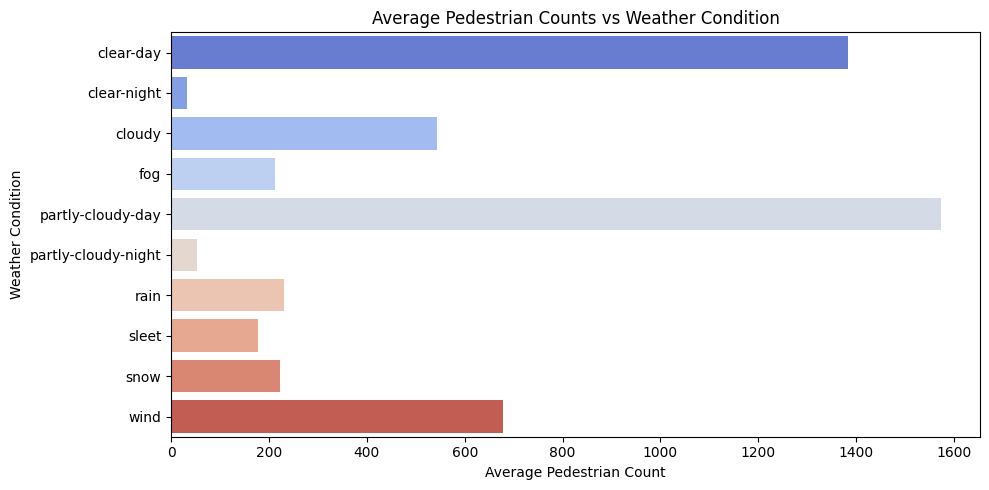

In [141]:
#2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['year'] = df['hour_beginning'].dt.year
df_2019 = df[df['year'] == 2019]
weather = df_2019.groupby('weather_summary')['Pedestrians'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Pedestrians', y='weather_summary', data=weather, palette='coolwarm')
plt.title('Average Pedestrian Counts vs Weather Condition')
plt.xlabel('Average Pedestrian Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='time_day'>

Text(0.5, 1.0, 'Pedestrian Activity')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Counts')

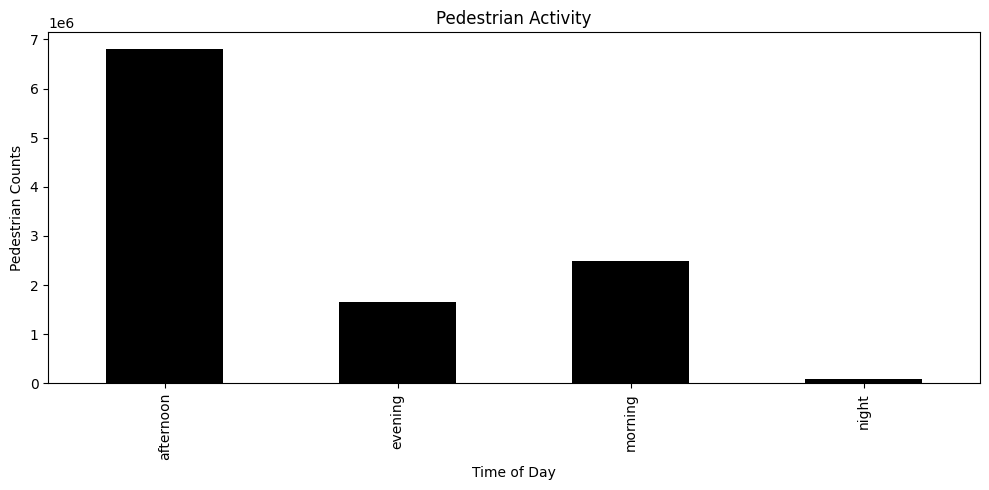

In [157]:
#3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

def categorize_day_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 23:
        return 'evening'
    else:
        return 'night'

df['hour'] = df['hour_beginning'].dt.hour
df['time_day'] = df['hour'].apply(categorize_day_time)

count = df.groupby('time_day')['Pedestrians'].sum()

plt.figure(figsize=(10, 5))
count.plot(kind='bar', color='black')
plt.title('Pedestrian Activity')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Counts')
plt.tight_layout()
plt.show()